<a href="https://colab.research.google.com/github/aynokt/q-macro/blob/main/test1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Standard Deviation of US GDP Cycle: 0.013194355527475866
Standard Deviation of Japan GDP Cycle: 0.01610216502622986
Correlation Coefficient between US and Japan GDP Cycles: 0.7125116352417644


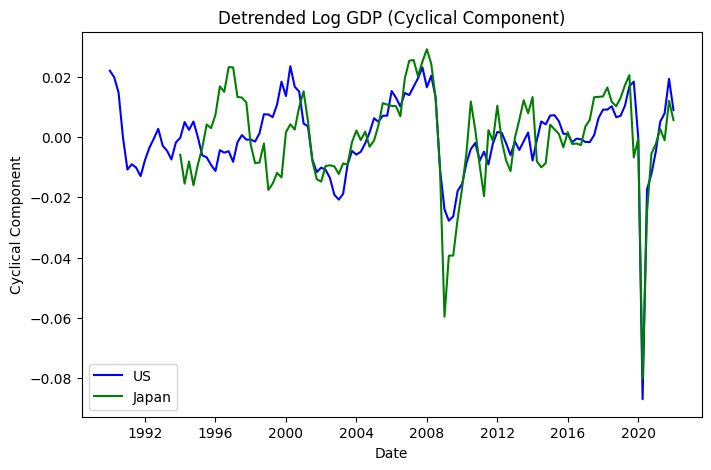

In [ ]:
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas_datareader as pdr
import numpy as np

# set the start and end dates for the data
start_date = '1990-01-01'
end_date = '2022-01-01'

# download the data from FRED using pandas_datareader
us_gdp = web.DataReader('GDPC1', 'fred', start_date, end_date)
japan_gdp = web.DataReader('JPNRGDPEXP', 'fred', start_date, end_date)

# Take the natural logarithm of the GDP data
log_us_gdp = np.log(us_gdp)
log_japan_gdp = np.log(japan_gdp)

# calculate the quarterly percent change in real GDP
gdp_pct_change_us = us_gdp.pct_change(4)
gdp_pct_change_japan = japan_gdp.pct_change(4)

# apply a Hodrick-Prescott filter to the data to extract the cyclical component
cycle_us, trend_us = sm.tsa.filters.hpfilter(log_us_gdp, lamb=1600)
cycle_japan, trend_japan = sm.tsa.filters.hpfilter(log_japan_gdp, lamb=1600)

# Calculate the standard deviation of the components
cycle_us_std = cycle_us.std()
cycle_japan_std = cycle_japan.std()

# Calculate the correlation coefficient between the components of US and Japan GDP
combined_cycles = pd.concat([ cycle_us, cycle_japan], axis=1).dropna()
combined_cycles.columns = ['Cycle_US', 'Cycle_Japan']
gdp_corr = combined_cycles.corr().iloc[0, 1]

# Print the results
print(f"Standard Deviation of US GDP Cycle: {cycle_us_std}")
print(f"Standard Deviation of Japan GDP Cycle: {cycle_japan_std}")
print(f"Correlation Coefficient between US and Japan GDP Cycles: {gdp_corr}")

# Plot the detrended log GDP (cyclical component) for both countries
plt.figure(figsize=(8, 5))

plt.plot(cycle_us, label="US", color='blue')
plt.plot(cycle_japan, label="Japan", color='green')
plt.title('Detrended Log GDP (Cyclical Component)')
plt.xlabel('Date')
plt.ylabel('Cyclical Component')
plt.legend()

# Show the plot
plt.show()




In [ ]:
from google.colab import drive
drive.mount('/content/drive')